# Titanic

Dataset https://www.kaggle.com/datasets/brendan45774/test-file

## Importing the libraries

In [411]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns;

## Importing the dataset

In [412]:
df = pd.read_csv('dataset/tested.csv')
df_copy = df.copy()


## Data Preprocessing

### Data Visualization

In [413]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [414]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [416]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Observaciones

* Vemos que hay muchos valores nulos en la columna Age, por lo que vamos a rellenarlos con la media de la columna. 

* Hay un valor nulo en la columna Fare y también podemos rellenarlo con la media de la columna.

* Podemos sumar las columnas SibSp y Parch para obtener el número de familiares a bordo.

* Hay demasiados valores nulos en la columna Cabin, por lo que vamos a eliminar la columna.

* El ticket y el passengerId no aportan información, por lo que vamos a eliminarlas.

* Name, sex y embarked son variables categóricas, por lo que vamos a convertirlas en variables numéricas.

* Además, creo que sería interesante separar el nombre en varias columnas, por ejemplo, el título, el apellido y el nombre.




### Data Cleaning

#### Nulos y columnas que no aportan información

In [417]:
df.drop(['Cabin'], axis=1, inplace=True)
df.drop(['Ticket'], axis=1, inplace=True)
df.drop(['PassengerId'], axis=1, inplace=True)

In [418]:
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Fare"].fillna(df["Fare"].mean(), inplace=True)

Ya no hay nulos en el dataset.

In [419]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### Suma de columnas SibSp y Parch

In [420]:
df["TotalFamily"] = df["SibSp"] + df["Parch"]
df.drop(['SibSp'], axis=1, inplace=True)
df.drop(['Parch'], axis=1, inplace=True)

#### Variables categóricas

In [421]:
df.Sex = df.Sex.map({'female': 1, 'male': 0})

In [422]:
df.Embarked = df.Embarked.map({'S': "Emb-Southampton", 'C': "Emb-Cherbourg", 'Q': "Emb-Queenstown"})
encoder = OneHotEncoder(sparse_output=False)
embarked = encoder.fit_transform(df[['Embarked']])
df=df.join(pd.DataFrame(embarked, columns=[cat for cat in encoder.categories_[0]]))
df.drop(['Embarked'], axis=1, inplace=True)

In [423]:
df["Title"] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
df["Surname"] = df.Name.apply(lambda x: x.split(',')[0].strip())
df["Name"] = df.Name.apply(lambda x: x.split('.')[1].split('(')[0].strip())


ordinal_encoder = OrdinalEncoder()
title_encoded = ordinal_encoder.fit_transform(df[["Title"]])
df["Title"] = title_encoded.astype(int)
name_encoded = ordinal_encoder.fit_transform(df[["Name"]])
df["Name"] = name_encoded.astype(int)
surname_encoded = ordinal_encoder.fit_transform(df[["Surname"]])
df["Surname"] = surname_encoded.astype(int)

In [424]:
df.head()

,Survived,Pclass,Name,Sex,Age,Fare,TotalFamily,Emb-Cherbourg,Emb-Queenstown,Emb-Southampton,Title,Surname
0,0,3,169,0,34.5,7.8292,0,0.0,1.0,0.0,5,172
1,1,3,169,1,47.0,7.0000,1,0.0,0.0,1.0,6,339
2,0,2,314,0,62.0,9.6875,0,0.0,1.0,0.0,5,231
3,0,3,8,0,27.0,8.6625,0,0.0,0.0,1.0,5,344
4,1,3,11,1,22.0,12.2875,2,0.0,0.0,1.0,6,150


df

### Correlation Matrix

Con los datos categoricos pasados a numericos podemos observar correlaciones que en un principio no podíamos.

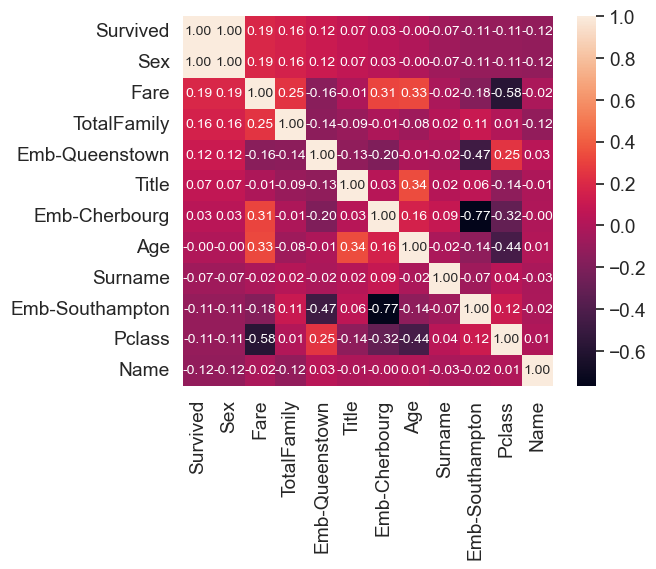

In [425]:
corrmat = df.corr()
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Survived')['Survived'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Hay una correlación total entre sex y survived, por lo que podemos clasificar si vivieron o no en función del sexo.

### Train and Test Split

In [426]:
def split_train_test(data, test_ratio):
    # https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html
    shuffled_indices = np.random.permutation(len(data)); 
    test_set_size = int(len(data) * test_ratio);
    test_indices = shuffled_indices[:test_set_size];
    train_indices = shuffled_indices[test_set_size:];
    return data.iloc[train_indices], data.iloc[test_indices];

In [427]:
train, test = split_train_test(df, 0.2)

In [428]:
x_train = train.drop(['Survived'], axis=1)
y_train = train['Survived']

### Training a classifier

In [429]:
y_train_survivors = train["Survived"] == 1
y_test_survivors = test["Survived"] == 1

In [431]:
from sklearn.linear_model import SGDClassifier
sdg_clasifier = SGDClassifier(random_state=42)
sdg_clasifier.fit(x_train, y_train_survivors)

SGDClassifier(random_state=42)

In [432]:
def print_sobrevive(val):
    print("Esta persona","sobrevive" if val else "no sobrevive")

In [434]:
x_train.iloc[0]

Pclass               3.0
Name               140.0
Sex                  0.0
Age                 36.5
Fare                17.4
TotalFamily          1.0
Emb-Cherbourg        0.0
Emb-Queenstown       0.0
Emb-Southampton      1.0
Title                5.0
Surname            349.0
Name: 260, dtype: float64

In [433]:
val = sdg_clasifier.predict([x_train.iloc[0]])
print_sobrevive(val)


Esta persona no sobrevive


c:\Users\brais.fernandezvazqu\Miniconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
